<a href="https://colab.research.google.com/github/Vignesh-kanna/ml_with_flask/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

In [2]:
df=pd.read_csv('/content/claimants.csv')

In [3]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [5]:
df.corr()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
CASENUM,1.000000,0.011717,0.028151,0.046044,-0.010003,-0.002512,-0.049590
ATTORNEY,0.011717,1.000000,0.079674,0.079439,-0.057189,0.010680,-0.219715
CLMSEX,0.028151,0.079674,1.000000,0.066413,-0.015024,-0.023195,-0.027611
CLMINSUR,0.046044,0.079439,0.066413,1.000000,0.021154,0.049493,0.005821
SEATBELT,-0.010003,-0.057189,-0.015024,0.021154,1.000000,-0.027992,0.111189
CLMAGE,-0.002512,0.010680,-0.023195,0.049493,-0.027992,1.000000,0.064612
LOSS,-0.049590,-0.219715,-0.027611,0.005821,0.111189,0.064612,1.000000


In [6]:
df.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [7]:
correlation = df['ATTORNEY'].corr(df['LOSS'])
print(correlation)

-0.2197150271023389


In [8]:
correlation = df['ATTORNEY'].corr(df['CLMSEX'])
correlation

0.07967388309782608

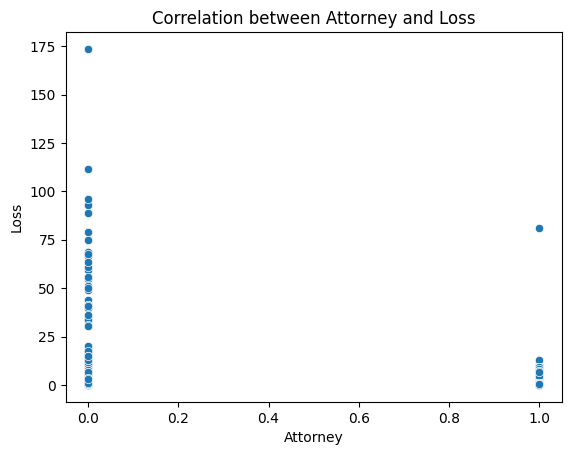

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='ATTORNEY', y='LOSS',data=df)
plt.title('Correlation between Attorney and Loss')
plt.xlabel("Attorney")
plt.ylabel("Loss")
plt.show()

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load
claimants = pd.read_csv("/content/claimants.csv")
claimants.drop(["CASENUM"],inplace=True,axis=1)
claimants = claimants.dropna()
print(claimants)
X= claimants.iloc[:,[1,2,3,4,5]]
print(X)
Y=claimants.iloc[:,0]
print(Y)
model=LogisticRegression(max_iter=300)
model.fit(X,Y)
dump(model, open('Logistic_Model.sav','wb'))
loaded_model=load(open('Logistic_Model.sav','rb'))
result=loaded_model.score(X,Y)
print(result)


      ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0            0     0.0       1.0       0.0    50.0  34.940
1            1     1.0       0.0       0.0    18.0   0.891
2            1     0.0       1.0       0.0     5.0   0.330
3            0     0.0       1.0       1.0    31.0   0.037
4            1     0.0       1.0       0.0    30.0   0.038
...        ...     ...       ...       ...     ...     ...
1334         1     1.0       1.0       0.0    16.0   0.060
1336         0     1.0       1.0       0.0    46.0   3.705
1337         1     1.0       1.0       0.0    39.0   0.099
1338         0     1.0       0.0       0.0     8.0   3.177
1339         1     1.0       1.0       0.0    30.0   0.688

[1096 rows x 6 columns]
      CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0        0.0       1.0       0.0    50.0  34.940
1        1.0       0.0       0.0    18.0   0.891
2        0.0       1.0       0.0     5.0   0.330
3        0.0       1.0       1.0    31.0   0.037
4        0.0       1.0